![Qiskit](https://user-images.githubusercontent.com/50955024/69568348-ac558780-0f78-11ea-9242-7ac8e8ba450a.png)

## The Bloch Sphere

The Bloch sphere is perhaps the most intuitive way in which to understand basic single qubit gates, as we can interpret them as rotations between different states. In this short notebook, we will use it to build an intuition for the single qubit gates x, y, z, h, s, rx, ry, rz, and how statevectors and bases works.

**Contributors:** Frederik Hardervig

In [30]:
#We first import numpy and matplotlib as they have useful functions.
import numpy as np
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

#When then import everything from qiskit, and more specifically the
#function for plotting a statevector in a bloch sphere.
from qiskit import *
from qiskit.visualization import plot_bloch_vector

# Import Aer, the library containing methods for simulation
from qiskit import Aer
# We import the qasm_simulator which simulates the noise one would
# see while using NISQ devices.
backend = Aer.get_backend('qasm_simulator')

The shots variable determines the amount of samples we use to negate some of the random noise that is simulated.
Setting this lower may lead to more prevalent noise, while higher values will require more computing time.

In [21]:
shots = 10000 #Try to set me to 1, 10, 100, 1000, 10 000 and run the circuit below!

The three variables below define three different basis. For now, we will leave them as they are and return to them a bit later in this notebook.

In [62]:
# Z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)

# X measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# Y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0);

With our bases in place, we can now define our function for simulating a circuit and returning a statevector.

In [23]:
# Our function takes the single qubit quantum circuit 'qc'
def simulate_circuit(qc):
    bloch_vector = [] #We create a list to store the information for each basis.
    for measure_circuit in [measure_x, measure_y, measure_z]: #We measure for each basis

        # Run the circuit with a the selected measurement and get the number of samples that output each bit value
        # We execute our circuit, add the transformation into the basis we care about (measure_circuit), 
        # use the QASM backeck, and sample equal to the amount of 'shots'.
        counts = execute(qc+measure_circuit, backend,shots=shots).result().get_counts()
        # We then calculate the probabilities for each bit value
        probs = {}
        for output in ['0','1']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0
        bloch_vector.append( probs['0'] -  probs['1'] )
    #We then return the bloch vector containing probabilities for each basis.
    return bloch_vector

You don't need to be able to replicate the code above, but know that it samples measurements from each basis by running the circuit several times (to get reliable results, upwards of 1000 to 10000 shots are not uncommon).

Now it is time to feed the function some circuits and see how the gates transforms the statevector of the qubit!

First, here are some gates to play around with:

| Method  | Description |
| ------------- | ------------- |
| .x(0)  | Flips state around x-axis  |
| .y(0)  | Flips state around y-axis  |
| .z(0)  | Flips state around z-axis  |
| .h(0)  | Switches z and x values by flipping<br> around axis between $\vert0\rangle$ and x  |
| .s(0)  | Switches x and y values  |
| .rx($\theta$,0)  | Rotate $\theta$ radians around the x-axis.  |
| .ry($\theta$,0)  | Rotate $\theta$ radians around the y-axis.  |
| .rz($\theta$,0)  | Rotate $\theta$ radians around the z-axis.  |

Note that the 0's just specifies which qubit to apply the gate to. This will be useful for later multiqubit circuits!

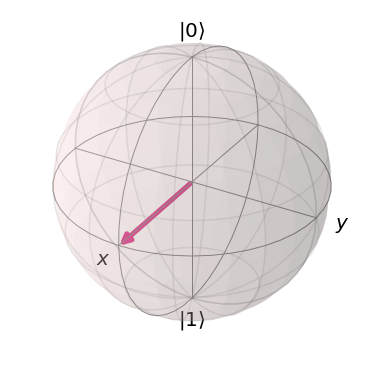

In [67]:
# We create a quantum circuit with just 1 qubit.
qc = QuantumCircuit(1)

# PUT GATES YOU WISH TO APPLY HERE!
#qc.h(0)
qc.ry(pi/2,0)
# We send the circuit to our simulator
result = simulate_circuit(qc)

# And plot the resulting statevector on a bloch sphere
plot_bloch_vector(result)

**Task 1:** Apply each gate individually and see what it does. (**Hint:** If nothing happens, the gate rotates around an axis with which you are currently parallel to. Use another gate to no longer be parallel.)

**Question 1:** Is .ry(pi/2, 0) equivalent to the Hadamard gate,.h(0)? Why, why not? <br>
**Question 2:** Does the order of the gates matter to the final position of the statevector?
**Question 3:** Identify the axis around which the phase gate, .s(0), rotates.

**Challenge 1:** Construct a circuit that ends at negative x (opposite of where a single Hadamard would leave you).<br>
**Challenge 2:** Construct a circuit which goes through all the poles of the x, y, and z, axes. <br>
**Challenge 3:** Construct a circuit that gives equal probability of measuring 0 and 1, and x and -x if you measured a single time.<br>
**Challenge 4:** Construct a circuit which gives 75% chance of measuring 1 and 25% of measuring 0 in the z basis.


### Choosing a Basis
Remember how we skipped over how we measure the different bases? Let's look at it again.
Unless otherwise specified, qubits are always initialized to $\vert0\rangle$, which means the qubit has a 100% chance (disregarding noise) to be measured as a 0 in the Z basis, something often called the computational basis. One can think of a basis as simply seeing how far along one of the axes the statevector is. When we measure in Qiskit, we measure the computational basis. However, this gives us no information about the x and y components of the statevector. 

**Challenge:** Can you figure out how the bases that we've copied from above gives us information about the x and y components? 

**Hint:** See them as quantum circuits, and send them to our simulator.

In [ ]:
# Z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0);

# X measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# Y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0);

**Final notes about bases:** Unlike normal bits that can be either 0 or 1, the different superpositions between amplitude and phase that are intrinsic to qubits leaves us with a lot of freedom when it comes to measuring their value. While we've only mentioned the x, y, and z basis, one could imagine an infinite amount of axes within the sphere, all of which are valid bases. However, as the quantum state of qubits collaps once we measure them, we must choose our basis with care, since we only get one measurement for every time we run the circuit. That is why we set `shots` to such a large number above, so that we can average over many measurements, and the reason we ran a for-loop which meant we ran these many repetition for each basis. This is what allowed us to obtain all components of our statevector above.